In [1]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df = shuffle(df)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2968,1,6.5,0.35,0.36,0.8,0.034,32.0,111.0,0.98942,3.11,0.50,12.1,8
1988,1,9.0,0.55,0.30,8.1,0.026,14.0,71.0,0.99300,2.94,0.36,11.8,5
3805,1,7.0,0.15,0.29,16.4,0.058,45.0,110.0,0.99780,3.15,0.37,9.7,6
3303,1,6.8,0.23,0.32,8.6,0.046,47.0,159.0,0.99452,3.08,0.52,10.5,6
2561,1,5.1,0.14,0.25,0.7,0.039,15.0,89.0,0.99190,3.22,0.43,9.2,6


In [3]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [4]:
#split and encode dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)
#one hot encode lables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
# Build NN model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
   Dense(8, activation='relu', input_dim=12),
   Dense(10,activation='softmax')
 ]);

classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 104       
                                                                 
 dense_22 (Dense)            (None, 10)                90        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

classifier.compile(optimizer = Adam(learning_rate=0.002), loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [36]:
history=classifier.fit(x_train, y_train, batch_size = 32, epochs = 500, validation_data=(x_test, y_test), verbose=2)

Epoch 1/500
162/162 - 1s - loss: 7.0807 - accuracy: 0.3421 - val_loss: 2.1128 - val_accuracy: 0.3759 - 540ms/epoch - 3ms/step
Epoch 2/500
162/162 - 0s - loss: 1.7663 - accuracy: 0.3992 - val_loss: 1.4437 - val_accuracy: 0.4223 - 310ms/epoch - 2ms/step
Epoch 3/500
162/162 - 0s - loss: 1.4750 - accuracy: 0.4251 - val_loss: 1.3332 - val_accuracy: 0.4625 - 197ms/epoch - 1ms/step
Epoch 4/500
162/162 - 0s - loss: 1.3670 - accuracy: 0.4495 - val_loss: 1.2556 - val_accuracy: 0.4640 - 165ms/epoch - 1ms/step
Epoch 5/500
162/162 - 0s - loss: 1.3000 - accuracy: 0.4563 - val_loss: 1.2471 - val_accuracy: 0.4687 - 168ms/epoch - 1ms/step
Epoch 6/500
162/162 - 0s - loss: 1.2771 - accuracy: 0.4696 - val_loss: 1.3062 - val_accuracy: 0.4285 - 193ms/epoch - 1ms/step
Epoch 7/500
162/162 - 0s - loss: 1.2608 - accuracy: 0.4727 - val_loss: 1.2178 - val_accuracy: 0.5267 - 193ms/epoch - 1ms/step
Epoch 8/500
162/162 - 0s - loss: 1.2456 - accuracy: 0.4897 - val_loss: 1.2037 - val_accuracy: 0.5159 - 158ms/epoch - 9

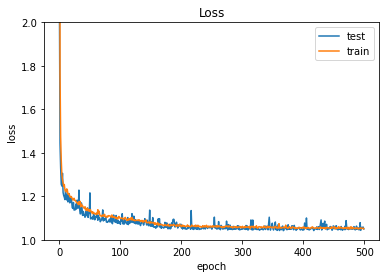

In [40]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.ylim([1, 2])
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

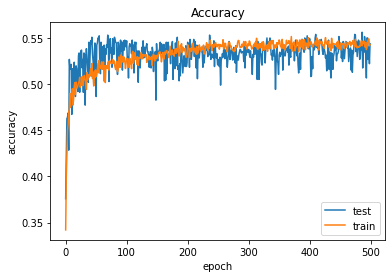

In [38]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='lower right')
plt.show()

In [39]:
# try cross validation
!pip install scikeras
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from scikeras.wrappers import KerasClassifier

xcv = x
ycv = to_categorical(y)

my_nn = KerasClassifier(classifier, epochs=40, batch_size=32, verbose=0)

cross_val_score(my_nn, xcv, ycv, cv=5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


array([0.54679041, 0.55572755, 0.53173375, 0.55650155, 0.52167183])